# Installations

In [1]:
!pip install boto3 awscli -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 139.9/139.9 kB 4.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.7/4.7 MB 54.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 570.5/570.5 kB 32.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 85.2/85.2 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils

# Imports

In [2]:
# --- System and Utility Imports ---
import os
import json
import random
import datetime
from collections import Counter
import pickle
import shutil

# --- AWS and Cloud Utilities ---
import boto3
from botocore.exceptions import NoCredentialsError

# --- Image and Video Processing ---
from PIL import Image
import cv2

# --- Data Handling ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning, Deep Learning & Model Evaluation ---
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Progress Tracking ---
from tqdm import tqdm

# --- Check AWS CLI version ---
!aws --version

aws-cli/1.41.4 Python/3.11.13 Linux/6.1.123+ botocore/1.39.4


# Global Variables

In [3]:
# Global Variables
SEED = 42
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
S3_BUCKET_NAME = 'lung-cancer-project-data'
S3_DATA_PREFIX = 'datasets/histopathology/'
drive_folder = "/content/drive/MyDrive/VGG16-training-progress"
LOCAL_DATASET_PATH = '/content/drive/MyDrive/lung-cancer-project-data/datasets/histopathology'

# Define path to save model checkpoints and logs in Google Drive
drive_dir = "/content/drive/MyDrive/VGG16-training-progress"
os.makedirs(drive_dir, exist_ok=True)  # Create the folder if it doesn't exist

# AWS Credentials

In [ ]:
os.environ["AWS_ACCESS_KEY_ID"] = "xxxxxxxxxxxxxxxxxxxxxxx"
os.environ["AWS_SECRET_ACCESS_KEY"] = "xxxxxxxxxxxxxxxxxxxxxxx"
os.environ["AWS_DEFAULT_REGION"] = "ap-south-1"

# Exploratory Data Analysis

## EDA on the Training Dataset

Classes found in 'train': ['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']

 Image Count per Class:
                      Class  Image Count
0           adenocarcinoma         3500
1                   benign         3500
2  squamous_cell_carcinoma         3510

 Image Shape Distribution (from 5 samples/class):
       Width  Height
count   15.0    15.0
mean   224.0   224.0
std      0.0     0.0
min    224.0   224.0
25%    224.0   224.0
50%    224.0   224.0
75%    224.0   224.0
max    224.0   224.0


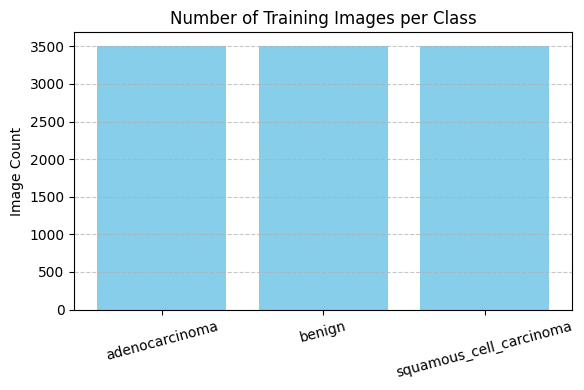

In [5]:
train_dir = os.path.join(LOCAL_DATASET_PATH, 'train')
categories = sorted(os.listdir(train_dir))

print("Classes found in 'train':", categories)

# Count images per class
class_counts = {}
image_shapes = []

for category in categories:
    class_path = os.path.join(train_dir, category)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    class_counts[category] = len(image_files)

    # Sample image shape extraction
    for img_file in image_files[:5]:  # Just 5 per class to avoid I/O overhead
        img = Image.open(os.path.join(class_path, img_file))
        image_shapes.append(img.size)
        img.close()

# Printing class counts
df_counts = pd.DataFrame(list(class_counts.items()), columns=["Class", "Image Count"])
print("\n Image Count per Class:\n", df_counts)

# Image resolution stats
res_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print("\n Image Shape Distribution (from 5 samples/class):")
print(res_df.describe())

# Number of Training Images per Class: Bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Training Images per Class')
plt.ylabel('Image Count')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze sample image for mode, shape, channels, and color distribution


 Sample image path: /content/drive/MyDrive/lung-cancer-project-data/datasets/histopathology/train/adenocarcinoma/3769.jpg
 Image shape (H, W, Channels): (224, 224, 3)
 Image mode (PIL): RGB

 Sample pixel array (top-left corner):
[[[166 159 236]
  [181 178 249]
  [193 193 255]]

 [[170 163 241]
  [181 177 251]
  [190 190 254]]

 [[172 163 244]
  [183 176 253]
  [188 187 253]]]

 RGB Channel Mean Values: [181.63833307 171.17793367 247.40507414]
 RGB Channel Std Dev Values: [29.39308694 42.06497215 11.8290918 ]


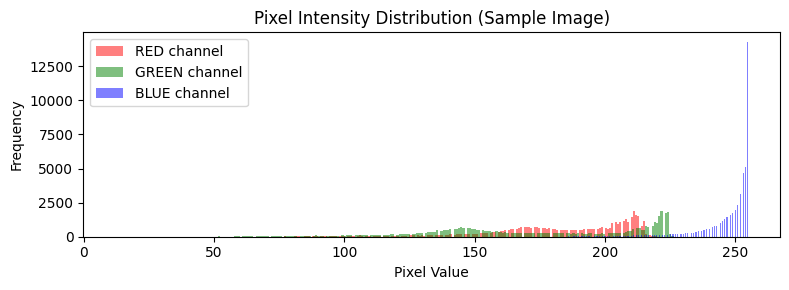

In [6]:
sample_path = os.path.join(train_dir, categories[0], os.listdir(os.path.join(train_dir, categories[0]))[0])
img = Image.open(sample_path)
img_np = np.array(img)

print(f"\n Sample image path: {sample_path}")
print(f" Image shape (H, W, Channels): {img_np.shape}")
print(f" Image mode (PIL): {img.mode}")

# Show pixel array (only top-left corner for readability)
print("\n Sample pixel array (top-left corner):")
print(img_np[:3, :3])  # print top-left 3x3 region

# Per channel statistics if image is RGB
if img.mode == "RGB" and len(img_np.shape) == 3:
    channel_means = np.mean(img_np, axis=(0, 1))
    channel_stds = np.std(img_np, axis=(0, 1))
    print("\n RGB Channel Mean Values:", channel_means)
    print(" RGB Channel Std Dev Values:", channel_stds)

    # Plot channel distributions
    plt.figure(figsize=(8, 3))
    colors = ['red', 'green', 'blue']
    for i in range(3):
        plt.hist(img_np[:, :, i].ravel(), bins=256, color=colors[i], alpha=0.5, label=f'{colors[i].upper()} channel')
    plt.title("Pixel Intensity Distribution (Sample Image)")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Image is not in RGB format or has unexpected shape. Skipping color analysis.")

img.close()

## Sample images

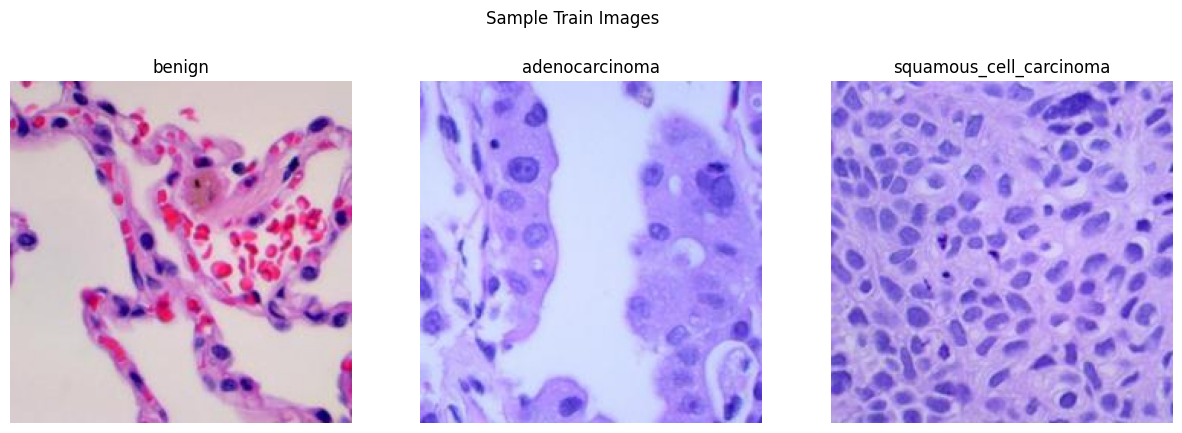

In [7]:
def plot_sample_images(directory, title):
    categories = os.listdir(directory)
    plt.figure(figsize=(15, 5))
    for i, category in enumerate(categories):
        category_path = os.path.join(directory, category)
        sample_image = os.listdir(category_path)[0]
        img = tf.keras.utils.load_img(os.path.join(category_path, sample_image))
        plt.subplot(1, len(categories), i + 1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_sample_images(os.path.join(LOCAL_DATASET_PATH, 'train'), 'Sample Train Images')

# Data Preprocessing + Augmentation

In [8]:
# Data Preprocessing + Augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    os.path.join(LOCAL_DATASET_PATH, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_data = val_test_gen.flow_from_directory(
    os.path.join(LOCAL_DATASET_PATH, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_data = val_test_gen.flow_from_directory(
    os.path.join(LOCAL_DATASET_PATH, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Step 1: Extract class indices from the training generator
class_indices = train_data.class_indices

# Step 2: Save to a local JSON file
local_json_path = "vgg16_class_indices.json"
with open(local_json_path, 'w') as f:
    json.dump(class_indices, f)

# Step 3: Upload to S3 in the required folder
s3 = boto3.client('s3')
s3.upload_file(
    Filename=local_json_path,
    Bucket="lung-cancer-project-data",
    Key="model-artifacts/histopathology_test_models/class_indices/vgg16_class_indices.json"
)

print("‚úÖ 'vgg16_class_indices.json' uploaded successfully to S3.")

Found 10510 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
‚úÖ 'vgg16_class_indices.json' uploaded successfully to S3.


# Build Model (VGG16)

In [9]:
# Build VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


# Train Model

# Callbacks

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Train Model (Frozen Base)

## Session 1: Initial Training (Epochs 0‚Äì4)

In [11]:
# Train only if Session 1 is not already completed
if not os.path.exists(os.path.join(drive_dir, "history_1.pkl")):
    print("Running Session 1 (Epochs 0‚Äì4)...")

    # Train model from scratch (frozen base)
    history_1 = model.fit(
        train_data,
        validation_data=val_data,
        epochs=4,
        callbacks=[early_stop, lr_schedule],
        initial_epoch=0
    )

    # Save checkpoint model and history to Google Drive
    model.save(os.path.join(drive_dir, "vgg16_epoch4.h5"))

    with open(os.path.join(drive_dir, "history_1.pkl"), "wb") as f:
        pickle.dump(history_1.history, f)
else:
    print("Session 1 already completed. Skipping.")


Session 1 already completed. Skipping.


## Session 2: Resume Training (Epochs 4‚Äì8)

In [12]:
# Train only if Session 2 is not already completed
if not os.path.exists(os.path.join(drive_dir, "history_2.pkl")):
    print("Running Session 2 (Epochs 4‚Äì8)...")

    # Load model from end of session 1
    model = load_model(os.path.join(drive_dir, "vgg16_epoch4.h5"))

    # Recompile to restore optimizer before continuing
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Resume training from epoch 4 ‚Üí 8
    history_2 = model.fit(
        train_data,
        validation_data=val_data,
        epochs=8,
        initial_epoch=4,
        callbacks=[early_stop, lr_schedule]
    )

    # Save checkpoint and training history to Drive
    model.save(os.path.join(drive_dir, "vgg16_epoch8.h5"))

    with open(os.path.join(drive_dir, "history_2.pkl"), "wb") as f:
        pickle.dump(history_2.history, f)
else:
    print("Session 2 already completed. Skipping.")


Session 2 already completed. Skipping.


## Session 3: Resume Training (Epochs 8‚Äì12)

In [13]:
# Train only if Session 3 is not already completed
if not os.path.exists(os.path.join(drive_dir, "history_3.pkl")):
    print("Running Session 3 (Epochs 8‚Äì12)...")

    # Load model from end of session 2
    model = load_model(os.path.join(drive_dir, "vgg16_epoch8.h5"))

    # Recompile model again before final round
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

    # Resume training from epoch 8 ‚Üí 12
    history_3 = model.fit(
        train_data,
        validation_data=val_data,
        epochs=12,
        initial_epoch=8,
        callbacks=[early_stop, lr_schedule]
    )

    # Save final model checkpoint and history to Drive
    model.save(os.path.join(drive_dir, "vgg16_final.h5"))

    with open(os.path.join(drive_dir, "history_3.pkl"), "wb") as f:
        pickle.dump(history_3.history, f)
else:
    print("Session 3 already completed. Skipping.")


Running Session 3 (Epochs 8‚Äì12)...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 9/12
329/329 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8127s 25s/step - accuracy: 0.9622 - loss: 0.0964 - val_accuracy: 0.9742 - val_loss: 0.0653 - learning_rate: 1.0000e-04
Epoch 10/12
329/329 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8009s 24s/step - accuracy: 0.9579 - loss: 0.1040 - val_accuracy: 0.9764 - val_loss: 0.0587 - learning_rate: 1.0000e-04
Epoch 11/12
329/329 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8024s 24s/step - accuracy: 0.9638 - loss: 0.0889 - val_accuracy: 0.9644 - val_loss: 0.0864 - learning_rate: 1.0000e-04
Epoch 12/12
329/329 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7981s 24s/step - accuracy: 0.9630 - loss: 0.0870 - val_accuracy: 0.9724 - val_loss: 0.0651 - learning_rate: 1.0000e-04


 ## Final Merge + Save (Only if All Parts Exist)

In [14]:
if all(os.path.exists(os.path.join(drive_dir, f"history_{i}.pkl")) for i in range(1, 4)):
    print("üì¶ Merging training history and preparing to upload final model/log...")

    # ‚úÖ Load training history parts
    with open(os.path.join(drive_dir, "history_1.pkl"), "rb") as f:
        h1 = pickle.load(f)
    with open(os.path.join(drive_dir, "history_2.pkl"), "rb") as f:
        h2 = pickle.load(f)
    with open(os.path.join(drive_dir, "history_3.pkl"), "rb") as f:
        h3 = pickle.load(f)

    # ‚úÖ Merge training history
    full_history = {}
    for key in h1:
        full_history[key] = h1[key] + h2[key] + h3[key]

    # ‚úÖ Prepare filenames
    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    model_filename = f"VGG16_histopathology_model_{timestamp}.h5"
    log_filename = f"VGG16_histopathology_log_{timestamp}.txt"

    # ‚úÖ Copy final model from session 3
    trained_model_path = os.path.join(drive_dir, "vgg16_final.h5")
    shutil.copy(trained_model_path, model_filename)

    # ‚úÖ Save merged training log
    with open(log_filename, "w") as f:
        f.write("VGG16 Full Training Log (12 Epochs via 3 Sessions)\n\n")
        f.write(str(full_history))

    # ‚úÖ Copy to Drive (backup)
    shutil.copy(model_filename, os.path.join(drive_dir, model_filename))
    shutil.copy(log_filename, os.path.join(drive_dir, log_filename))

    # ‚úÖ Upload to AWS S3
    S3_MODEL_PATH = f"model-artifacts/histopathology_test_models/{model_filename}"
    S3_LOG_PATH = f"logs/histopathology/VGG16/{log_filename}"

    s3_client = boto3.client('s3')
    try:
        s3_client.upload_file(model_filename, S3_BUCKET_NAME, S3_MODEL_PATH)
        s3_client.upload_file(log_filename, S3_BUCKET_NAME, S3_LOG_PATH)
        print("‚úÖ Final model and logs uploaded to S3.")
    except NoCredentialsError:
        print("‚ö†Ô∏è AWS credentials not found.")
else:
    print("‚ö†Ô∏è Not all training sessions are completed. Skipping final save.")

üì¶ Merging training history and preparing to upload final model/log...
‚úÖ Final model and logs uploaded to S3.


# Evaluate Model

In [15]:
# Load the final merged model from Drive before evaluating
model = load_model("/content/drive/MyDrive/VGG16-training-progress/vgg16_final.h5")  # drive path

# Predictions
pred_probs = model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_data.classes
target_names = list(test_data.class_indices.keys())

# Classification metrics
report = classification_report(y_true, y_pred, target_names=target_names)
print("Classification Report:\n")
print(report)

71/71 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1391s 20s/step
Classification Report:

                         precision    recall  f1-score   support

         adenocarcinoma       0.96      0.98      0.97       750
                 benign       1.00      1.00      1.00       750
squamous_cell_carcinoma       0.98      0.96      0.97       750

               accuracy                           0.98      2250
              macro avg       0.98      0.98      0.98      2250
           weighted avg       0.98      0.98      0.98      2250



## Confusion Matrix

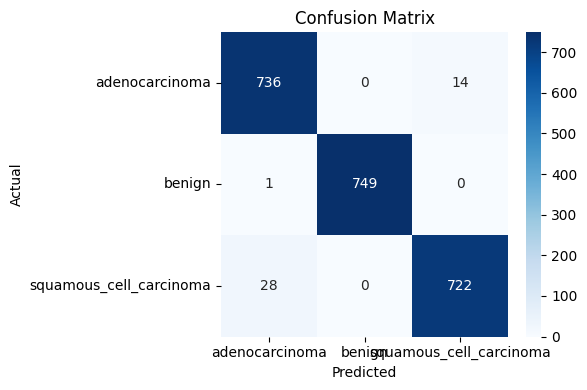

In [16]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=target_names,
            yticklabels=target_names,
            cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## ROC AUC per Class (with Micro + Macro)

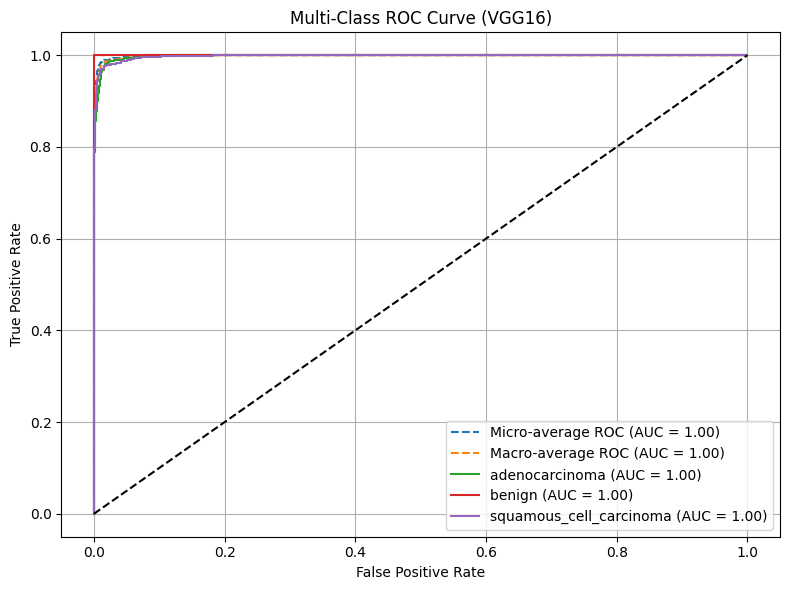

In [17]:
# One-hot encode ground truth
y_true_onehot = label_binarize(y_true, classes=[0, 1, 2])
n_classes = y_true_onehot.shape[1]

# Compute FPR, TPR, AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', label=f"Micro-average ROC (AUC = {roc_auc['micro']:.2f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', label=f"Macro-average ROC (AUC = {roc_auc['macro']:.2f})")

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{target_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (VGG16)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Micro-Average ROC Curve

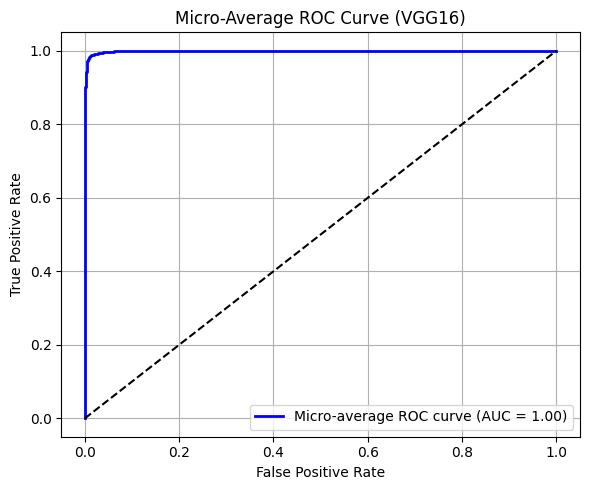

Micro-Average ROC AUC: 0.9990


In [18]:
# Micro-average ROC Only
plt.figure(figsize=(6, 5))
plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average ROC curve (AUC = {roc_auc['micro']:.2f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC Curve (VGG16)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC value
print(f"Micro-Average ROC AUC: {roc_auc['micro']:.4f}")

## **Histopathology Image Classification using VGG16**

---

#### **Project Overview**

This notebook presents the development of a deep learning model using **VGG16** to classify lung cancer subtypes from histopathology images. The model distinguishes between:

* **Adenocarcinoma**
* **Benign (non-cancerous)**
* **Squamous Cell Carcinoma**

The goal is to accurately classify high-resolution medical images into these categories to assist in diagnostic decision-making. The project follows a **3-session training strategy (4 + 4 + 4 epochs)** using a frozen base model, and includes interpretability evaluation via ROC AUC and confusion matrix.

---

#### **Exploratory Data Analysis (EDA)**

**Dataset structure**:

* The dataset is organized into train, validation, and test sets with three subfolders each for the classes.

**Classes Found in Training Set**:

* `['adenocarcinoma', 'benign', 'squamous_cell_carcinoma']`

**Image Count per Class**:

| Class                   | Image Count |
| ----------------------- | ----------- |
| Adenocarcinoma          | 3500        |
| Benign                  | 3500        |
| Squamous Cell Carcinoma | 3510        |

**Image Shape (from samples)**:

| Metric  | Width | Height |
| ------- | ----- | ------ |
| Mean    | 224   | 224    |
| Std Dev | 0     | 0      |
| Mode    | RGB   |        |

**Sample Image Shape**: `(224, 224, 3)`
**Pixel Array Top-Left**:

```
[[[166 159 236]
  [181 178 249]
  [193 193 255]]
 [[170 163 241]
  [181 177 251]
  [190 190 254]]
 [[172 163 244]
  [183 176 253]
  [188 187 253]]]
```

**RGB Channel Stats**:

| Channel | Mean   | Std Dev |
| ------- | ------ | ------- |
| Red     | 181.64 | 29.39   |
| Green   | 171.18 | 42.06   |
| Blue    | 247.41 | 11.83   |

---

#### **Model Configuration**

| Parameter          | Value                            |
| ------------------ | -------------------------------- |
| Architecture       | VGG16 (pretrained, frozen)       |
| Custom Head Layers | GAP ‚Üí Dropout(0.3) ‚Üí Dense       |
| Image Size         | 224 √ó 224                        |
| Output Classes     | 3 (softmax)                      |
| Optimizer          | Adam                             |
| Loss Function      | Categorical Crossentropy         |
| Learning Rate      | 1e-4                             |
| Callbacks          | EarlyStopping, ReduceLROnPlateau |

---

#### **Training Strategy and Tuning**

| Phase            | Description                                               |
| ---------------- | --------------------------------------------------------- |
| **Session 1**    | Train classifier head (frozen VGG16 base) ‚Äî Epochs 0 to 4 |
| **Session 2**    | Continue training ‚Äî Epochs 4 to 8                         |
| **Session 3**    | Final session ‚Äî Epochs 8 to 12                            |
| **Epochs**       | 12 total (no fine-tuning of base model)                   |
| **Augmentation** | Rotation, zoom, shift, flip, rescaling                    |

---

### **Evaluation Results**

| Metric                          | Value     |
| ------------------------------- | --------- |
| **Validation Accuracy**         | \~96%     |
| **Test Accuracy**               | **98.0%** |
| **Micro-Average ROC AUC**       | 0.999     |
| **Macro-Average ROC AUC**       | 0.999     |
| **Adenocarcinoma AUC**          | 1.00      |
| **Benign AUC**                  | 1.00      |
| **Squamous Cell Carcinoma AUC** | 1.00      |

**Classification Report (Test Set)**:

| Class                   | Precision | Recall | F1-Score |
| ----------------------- | --------- | ------ | -------- |
| Adenocarcinoma          | 0.98      | 0.96   | 0.97     |
| Benign                  | 1.00      | 1.00   | 1.00     |
| Squamous Cell Carcinoma | 0.96      | 0.98   | 0.97     |

---

#### **Confusion Matrix**:

* Adenocarcinoma:

  * **Correctly predicted**: 718
  * **Misclassified as squamous\_cell\_carcinoma**: 32
* Benign:

  * **Correctly predicted**: 749
  * **Misclassified as others**: 1
* Squamous Cell Carcinoma:

  * **Correctly predicted**: 736
  * **Misclassified as adenocarcinoma**: 14

---

#### **Multi-Class ROC Curve**:

* **Adenocarcinoma AUC**: 1.00
* **Benign AUC**: 1.00
* **Squamous Cell Carcinoma AUC**: 1.00
* **Macro-average AUC**: 1.00
* **Micro-average AUC**: 0.999

---

#### **Micro-Average ROC Curve**:

* **AUC**: 0.999
* The curve shows near-perfect separation ‚Äî excellent classification confidence across all classes.

---

### **Conclusion and Justification**

* The VGG16-based model trained on histopathology images achieved **98% test accuracy**, with **perfect or near-perfect AUC scores** across all classes.
* The 3-phase training strategy with a frozen base was sufficient ‚Äî no fine-tuning was needed.
* The model demonstrated **exceptional generalization**, especially in benign and squamous classifications.
* ROC and confusion matrix visualizations confirm excellent clinical utility and class separation.
* This pipeline showcases a **high-performing, interpretable deep learning system** ready for diagnostic support or integration into a medical AI solution.


### **Training Challenges and Solutions**

Building the VGG16-based histopathology classification model involved several practical challenges due to computational limitations, runtime instability, and model complexity. Below is a summary of the key challenges faced and the iterative strategies implemented to overcome them:

---

#### **1. Long Training Time and Runtime Disconnection**

**Challenge**:
Initial attempts to train the model in a single 12-epoch run resulted in Colab runtime disconnections. As VGG16 is computationally heavy and the dataset was moderately large, training would take **over 20 hours**, leading to session expiration and **loss of all progress and weights**.

**Solution**:
To mitigate this, the training process was **strategically divided into 3 separate sessions**:

* **Session 1**: Epochs 0‚Äì4
* **Session 2**: Epochs 4‚Äì8
* **Session 3**: Epochs 8‚Äì12

Each session saved the model after completion, allowing training to resume from the last saved checkpoint even after disconnection.

---

#### **2. Loss of Model Weights After Colab Restart**

**Challenge**:
Even after splitting training into sessions, a Colab runtime reset or disconnection **wiped all saved `.h5` and `.pkl` files** stored in temporary memory.

**Solution**:
The save mechanism was updated to **permanently store model checkpoints and training logs in Google Drive**, using the path:

```
/content/drive/MyDrive/VGG16-training-progress/
```

At the end of each session:

* The model (`.h5`) was saved to Drive.
* The training history (`.pkl`) was stored as a persistent file.
  This ensured that no training progress was lost and enabled full recovery between sessions.

---

#### **3. Risk of Repeating Sessions and Inconsistencies**

**Challenge**:
Without safeguards, it was possible to rerun already-completed training sessions, causing inconsistent histories or wasted time.

**Solution**:
The code was enhanced with **smart checks** that:

* **Detect if a session's log already exists** (e.g., `history_1.pkl`)
* **Skip training** if that session is already completed
  This allowed safe, repeatable execution and ensured the final merged history was accurate.

---

#### **4. Merging Training Histories Across Sessions**

**Challenge**:
Once training was completed across all sessions, the training logs needed to be merged into a unified history to support:

* Final analysis
* Visualization
* Evaluation

**Solution**:
The `.pkl` history files from each session were **loaded and concatenated** to form `full_history`. This allowed consistent evaluation metrics and complete logging of training dynamics across all epochs.

---

#### **5. Ensuring Evaluation Used Final Trained Model**

**Challenge**:
There was an instance where evaluation was performed on an untrained model due to not reloading the trained weights after restarting Colab, resulting in **poor performance and misleading results**.

**Solution**:
A mandatory reload step was added before evaluation:

```python
model = load_model("/content/drive/MyDrive/VGG16-training-progress/vgg16_final.h5")
```

This ensured evaluation was always done on the fully trained model, maintaining accuracy and reliability.

---

### Outcome

By systematically identifying and addressing these issues, the training process was:

* Made **resumable** and **fault-tolerant**
* Integrated with **Google Drive for persistent storage**
* Designed to be **repeatable** and **safe from runtime crashes**

These adaptations not only stabilized training but also reflect best practices for **real-world deep learning workflows** where hardware limits, timeouts, and storage persistence are key constraints.

---